In [26]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# データセットの読み込み
ここでは、企業が従業員の離職を減少させるために人事部が離職要因の特定と各従業員の離職確率の予測精度向上を目標としているとする。

人事部の達成目標
 - 離職要因の特定
 - 各従業員の離職予測

In [27]:
HR_DATASET_PATH = "datasets/HR_comma_sep.csv"

hr_df = pd.read_csv(HR_DATASET_PATH)
print(hr_df.shape)
hr_df.head()

(14999, 10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [28]:
hr_df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [29]:
# salary(給与水準)をダミー変数へ置換する
hr_df.salary.replace({'low': 1, 'medium': 2, 'high': 3}, inplace=True)
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1


# k-平均法(k-means)
とりあえず適当に分けてしまって、それからよりうまく分かれるように調整していくことによって、クラスタリングを行う方法。クラスタ数$k$(いくつに分けたいか)はユーザが前もって決定する。また、各クラスタは平均ベクトルなどの代表ベクトルで表現される。

## k-平均法のアルゴリズム
$
入力：事例ベクトル集合D = \left\{{x}^{\left(1\right)}, {x}^{\left(2\right)}, \dots, {x}^{ \left(\left| D \right|\right) }\right\}\\
\quad：クラスタ数k\\
無作為に{m}_{1}, {m}_{2}, \cdots, {m}_{k}を決定。\\
until　収束\\
\quad foreach　{x}^{i} \in D\\
\quad \quad {c}_{max} = arg \max _{c}{ sim\left({x}^{\left(i\right)}, {m}_{c}\right) }\\
\quad \quad insert　x^{\left(i\right)}　into　{c}_{max}\\
\quad end　foreach\\
\quad \forall c,\quad { m }_{ c }=\frac { 1 }{ \left| c \right|  } \sum _{ { x }^{ \left( i \right)  }\in c }{ { x }^{ ^{ \left( i \right)  } } } \\
end　until
$

k-平均法は、初期値によって結果が変化する。適切な初期値を設定することで、計算時間を減少させ、しかもより良い結果を得ることができる。例えば、凝集型クラスタリングの結果を初期値として利用する方法などが使われている。

---
# 実装例

## 学習

In [30]:
X = hr_df.drop(['left', 'sales'], axis=1)
K = 3

In [31]:
from sklearn.cluster import KMeans

# k-平均法の実施
# http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
km = KMeans(n_clusters=K, random_state=0)
km_model = km.fit(X)

## 各クラスタの重心ベクトルからの距離を計算

In [34]:
km_model.transform(X)

array([[ 10.51750848, 101.35959276,  45.74092433],
       [115.46324699,   4.3716126 ,  59.3729912 ],
       [125.47716617,  13.94099079,  69.38228428],
       ...,
       [  3.8637164 , 115.35560834,  59.73061014],
       [133.45005419,  21.74999525,  77.34136763],
       [ 11.50912034, 100.35996838,  44.74202542]])

## 各クラスタに分類

In [35]:
km_model.predict(X)

array([0, 1, 1, ..., 0, 1, 0], dtype=int32)

## 評価

In [39]:
km_model.score(X)

-4397012.905651176

## プロット

In [36]:
hr_df['label'] = km_model.predict(X)

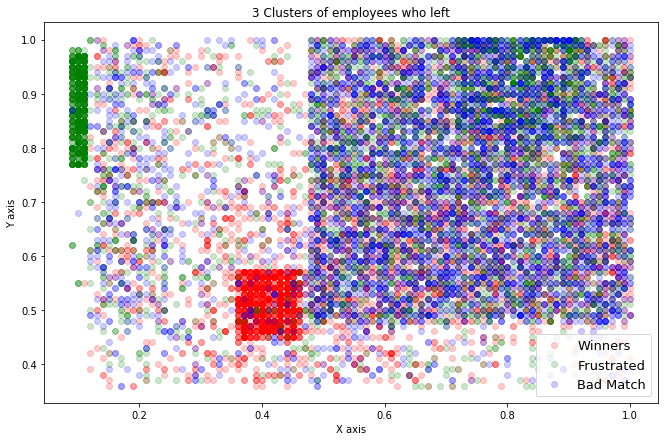

In [41]:
centers = km_model.cluster_centers_

# scater method → http://pythondatascience.plavox.info/matplotlib/%E6%95%A3%E5%B8%83%E5%9B%B3
plt.figure(figsize=(11,7))
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('3 Clusters of employees who left')

plt.plot(hr_df.satisfaction_level[hr_df.label==0], hr_df.last_evaluation[hr_df.label==0],'o', alpha = 0.2, color = 'r')
plt.plot(hr_df.satisfaction_level[hr_df.label==1], hr_df.last_evaluation[hr_df.label==1],'o', alpha = 0.2, color = 'g')
plt.plot(hr_df.satisfaction_level[hr_df.label==2], hr_df.last_evaluation[hr_df.label==2],'o', alpha = 0.2, color = 'b')
plt.legend(['Winners','Frustrated','Bad Match'], loc = 'best', fontsize = 13, frameon=True)

plt.show()

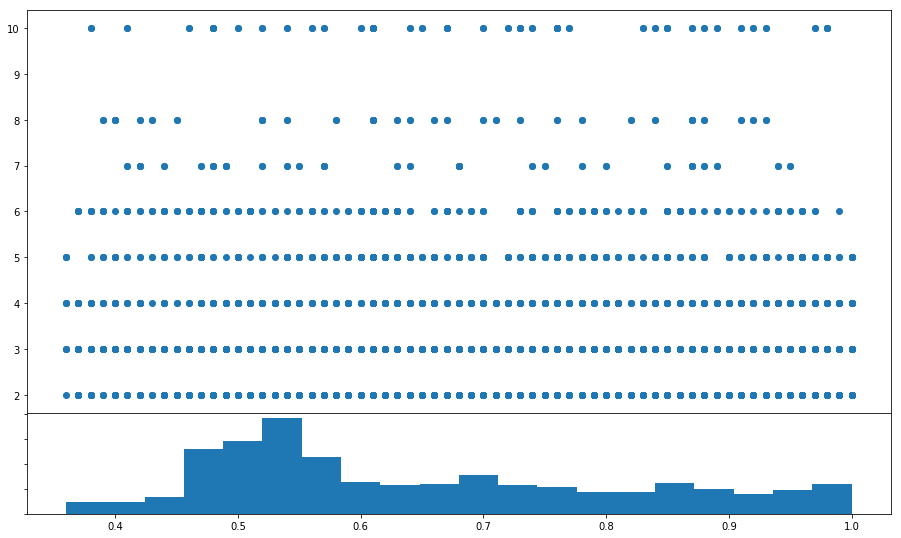

In [42]:
fig = plt.figure(figsize=(12, 7))

# サブプロットを8:2で分割
ax1 = fig.add_axes((0, 0.2, 1, 0.8))
ax2 = fig.add_axes((0, 0, 1, 0.2), sharex=ax1)

# 散布図のx軸のラベルとヒストグラムのy軸のラベルを非表示
ax1.tick_params(labelbottom="off")
ax2.tick_params(labelleft="off")

ax1.plot(hr_df.last_evaluation[hr_df.label==0], X.time_spend_company[hr_df.label==0], "o")
ax2.hist(hr_df.last_evaluation[hr_df.label==0], bins=20)

plt.show()